First we give an example of the tracking data

In [1]:
import supervision as sv
import cv2
import numpy as np
import os
import pandas as pd

In [5]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

def detection_to_vis_formatter():
    detections = sv.Detections(
    xyxy=np.array([x0, y0, x1, y1]),
    class_id=np.array([0]),
    confidence=np.array([0.94])
)

In [6]:
test_sequence =  load_images_from_folder('C:/Studie/BEP/Data/Soccernet_tracking_data/tracking-2023/train/SNMOT-060/img1')
csv_file = 'C:/Studie/BEP/Data/Soccernet_tracking_data/tracking-2023/train/SNMOT-060/gt/gt.txt'
csv_data = pd.read_csv(csv_file, header=None)

# Define the column names for the CSV
csv_data.columns = ['frame_id', 'track_id', 'x_min', 'y_min', 'width', 'height', 'confidence', 'col1', 'col2', 'col3']

In [ ]:
sv.plot_image(test_sequence[749])

In [7]:

# Choose a frame ID to visualize (for example, frame_id = 3)
frame_id_to_visualize = 740

# Filter rows for the selected frame ID
frame_data = csv_data[csv_data['frame_id'] == frame_id_to_visualize]

# Iterate over each row and draw the bounding box on the image
for index, row in frame_data.iterrows():
    # Get bounding box coordinates and dimensions
    x_min = int(row['x_min'])
    y_min = int(row['y_min'])
    width = int(row['width'])
    height = int(row['height'])
    track_id = int(row['track_id'])
    # Draw rectangle (bounding box) on the image
    start_point = (x_min, y_min)
    end_point = (x_min + width, y_min + height)
    color = (255, 0, 0)  # Green color for the bounding box
    thickness = 2  # Thickness of the box

 # Label the bounding box with track_id
    label = f'ID: {track_id}'
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    text_color = (255, 0, 0)  # Blue color for the label text

    # Calculate the position to place the label (just above the bounding box)
    label_position = (x_min, y_min - 10 if y_min - 10 > 10 else y_min + 20)

    # Put the track_id label on the image
    test_image = cv2.putText(test_sequence[frame_id_to_visualize - 1], label, label_position, font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    # Draw bounding box
    test_image = cv2.rectangle(test_sequence[frame_id_to_visualize - 1], start_point, end_point, color, thickness)

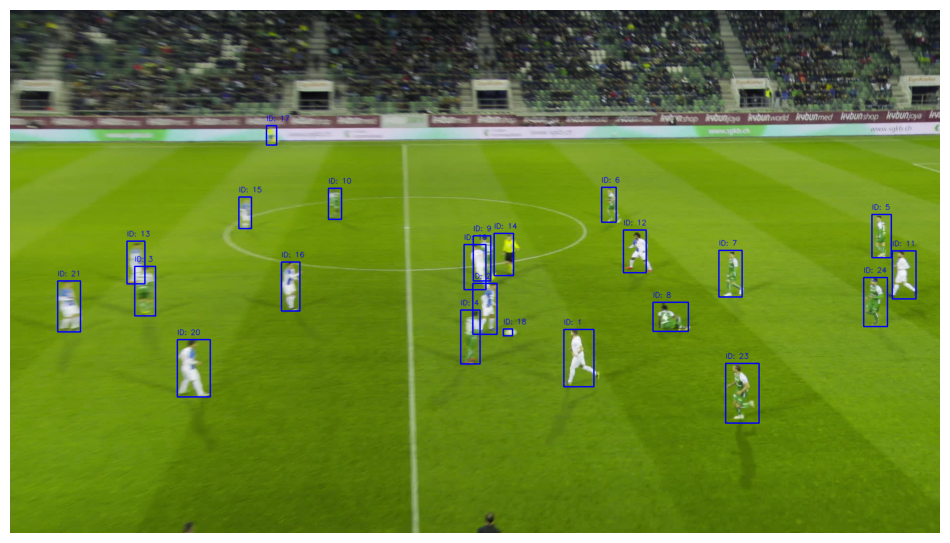

In [8]:
sv.plot_image(test_image)